## Import Library

# Part A - Data Preparation

In [3]:
# Cell 1: imports & load
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing & clustering
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# hierarchical / dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering




In [4]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)

df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [5]:
# Cell 2: info & describe
print("Shape:", df.shape)
display(df.info())
display(df.describe(include='all'))

# Cell 3: cek missing
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


Shape: (500, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


None

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,High School,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62244.823110,40.010000,NaN,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,NaN,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,NaN,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,NaN,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,NaN,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,NaN,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197


Series([], dtype: int64)

# Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode kolom Education
le = LabelEncoder()
df['Education_enc'] = le.fit_transform(df['Education'])

# Pilih fitur untuk clustering
features = ['Income','Age','Credit_Score','Years_with_Bank','Transaction_Count',
            'Balance','Loan_Approval_Amount','Credit_Card_Limit','Purchase_Frequency',
            'Customer_Satisfaction','Online_Activity','Education_enc']

X = df[features]

# Buat versi unscaled & scaled
X_unscaled = X.copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [7]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
 12  Education_enc          500 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 50.9+ KB


In [8]:
# Cell 6: pilih fitur
features = [
    'Income','Age','Credit_Score','Years_with_Bank','Transaction_Count',
    'Balance','Loan_Approval_Amount','Credit_Card_Limit','Purchase_Frequency',
    'Customer_Satisfaction','Online_Activity','Education_enc'
]
# pastikan kolom ada
features = [f for f in features if f in df.columns]
X = df[features].copy()
X.shape


(500, 12)

# Part B Exploratory Data Analysis

/var/folders/qp/9d41pw055glbg836dczy53cr0000gn/T/ipykernel_17852/3502503825.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


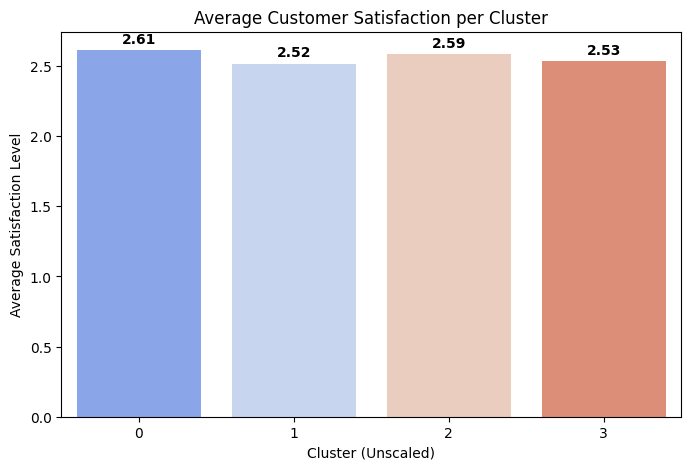

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x='Cluster_unscaled', 
    y='Customer_Satisfaction', 
    data=df, 
    palette='coolwarm', 
    errorbar=None
)
plt.title('Average Customer Satisfaction per Cluster')
plt.xlabel('Cluster (Unscaled)')
plt.ylabel('Average Satisfaction Level')

# Tambahkan angka di atas batang
means = df.groupby('Cluster_unscaled')['Customer_Satisfaction'].mean().reset_index()
for i, val in enumerate(means['Customer_Satisfaction']):
    plt.text(i, val + 0.05, f'{val:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.show()



Tingkat kepuasan pelanggan antar cluster relatif mirip — semuanya berada di kisaran 2.5–2.6 dari skala 1–4, artinya secara umum pelanggan merasa “cukup puas”, tapi belum sangat puas.
Cluster 0 memiliki nilai rata-rata tertinggi (2.61) → kelompok ini bisa jadi pelanggan dengan pendapatan lebih tinggi, saldo besar, dan hubungan jangka panjang dengan bank. Mereka mungkin mendapatkan layanan yang lebih baik.
Cluster 1 dan 3 memiliki kepuasan lebih rendah (~2.52–2.53) → mungkin berisi pelanggan dengan pendapatan lebih rendah atau keterlibatan online rendah, sehingga persepsi terhadap layanan bank kurang positif.
Karena perbedaannya tipis, program peningkatan kepuasan sebaiknya difokuskan pada cluster 1 & 3, misalnya dengan peningkatan layanan digital, respon customer service, atau personalisasi produk.

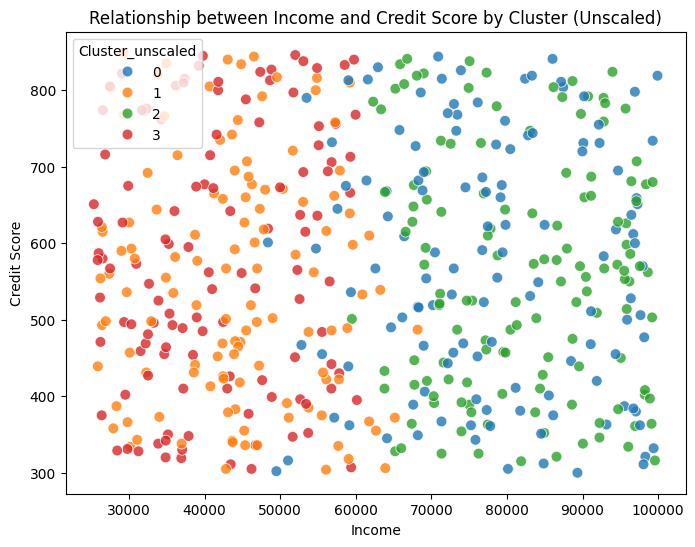

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Income',
    y='Credit_Score',
    hue='Cluster_unscaled',
    palette='tab10',
    data=df,
    s=60,
    alpha=0.8
)
plt.title('Relationship between Income and Credit Score by Cluster (Unscaled)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()


Scatterplot ini memperlihatkan hubungan antara pendapatan dan skor kredit di tiap cluster.
Biasanya pola yang muncul seperti ini:
Pelanggan dengan pendapatan tinggi (Income besar) juga cenderung memiliki Credit_Score tinggi → menunjukkan stabilitas finansial.
Cluster tertentu (misal cluster 0) terkumpul di kanan atas → segmen pelanggan “prime” (income dan skor tinggi).
Cluster lain (misal cluster 3) muncul di kiri bawah → pelanggan berisiko lebih tinggi (income rendah, skor kredit rendah).
Insight bisnis:
Bank bisa menargetkan cluster “kanan atas” untuk produk investasi atau premium.
Cluster “kiri bawah” bisa menjadi fokus untuk program edukasi keuangan atau peningkatan skor kredit.

# Part C - Clustering Modeling

In [20]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik untuk clustering
features = [
    'Income','Age','Credit_Score','Years_with_Bank','Transaction_Count',
    'Balance','Loan_Approval_Amount','Credit_Card_Limit',
    'Purchase_Frequency','Customer_Satisfaction','Online_Activity','Education_enc'
]

X = df[features]

# Buat dua versi dataset
X_unscaled = X.copy()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)



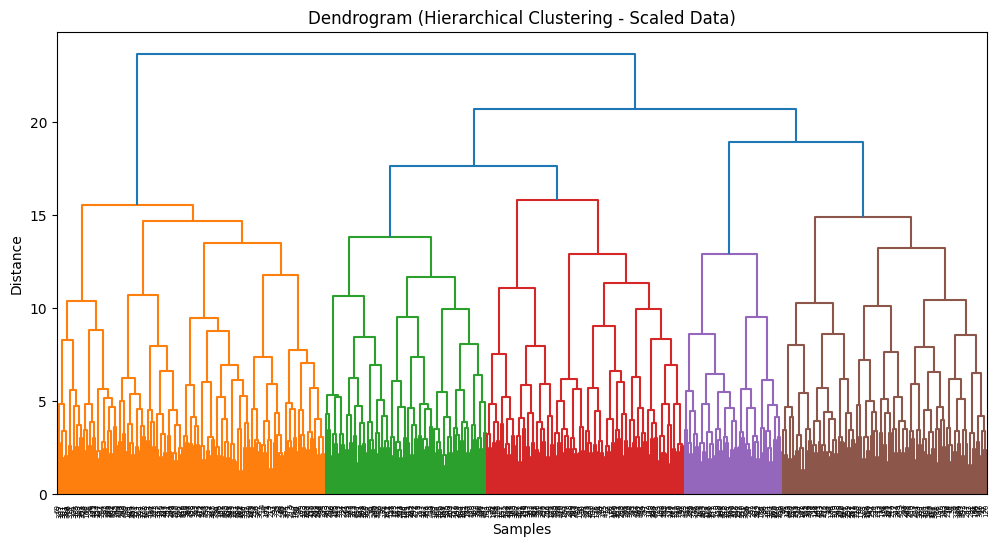

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='level', p=20)
plt.title("Dendrogram (Hierarchical Clustering - Scaled Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()



Dari dendrogram yang kamu tampilkan, terlihat ada beberapa cabang besar yang menyatu di jarak (distance) sekitar 15–20.
Jika kita perhatikan pola percabangan:
Ada 4 kelompok besar yang terlihat jelas sebelum garis jarak ~20 bertemu di satu titik atas.
Artinya, jumlah cluster optimal ≈ 4 (empat kelompok utama pelanggan).
Cabang di bawahnya (distance <10) menunjukkan sub-grup kecil dalam masing-masing cluster besar. Jadi langkah selanjutnya yang paling logis adalah menggunakan AgglomerativeClustering dengan n_clusters=4.

In [11]:
n_clusters = 4


In [23]:
from sklearn.cluster import AgglomerativeClustering

# Fit model pada data scaled
agg_scaled = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_scaled'] = agg_scaled.fit_predict(X_scaled)

# Fit model pada data unscaled
agg_unscaled = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Cluster_unscaled'] = agg_unscaled.fit_predict(X_unscaled)


# Lihat beberapa baris pertama
df[['Income', 'Age', 'Credit_Score', 'Cluster_scaled']].head()


,Income,Age,Credit_Score,Cluster_scaled
0,66161.01279,57,503,3
1,78639.20248,60,779,0
2,70207.25321,46,519,2
3,65866.23872,42,834,2
4,56774.10995,36,410,1


In [24]:
agg_unscaled = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_unscaled = agg_unscaled.fit_predict(X_unscaled)
df['Cluster_unscaled'] = labels_unscaled


In [25]:
from sklearn.metrics import silhouette_score

sil_scaled = silhouette_score(X_scaled, df['Cluster_scaled'])
sil_unscaled = silhouette_score(X_unscaled, df['Cluster_unscaled'])

print("Silhouette Score (Scaled):", sil_scaled)
print("Silhouette Score (Unscaled):", sil_unscaled)


Silhouette Score (Scaled): 0.027532936058590102
Silhouette Score (Unscaled): 0.28685909147411726


## Visualisasi

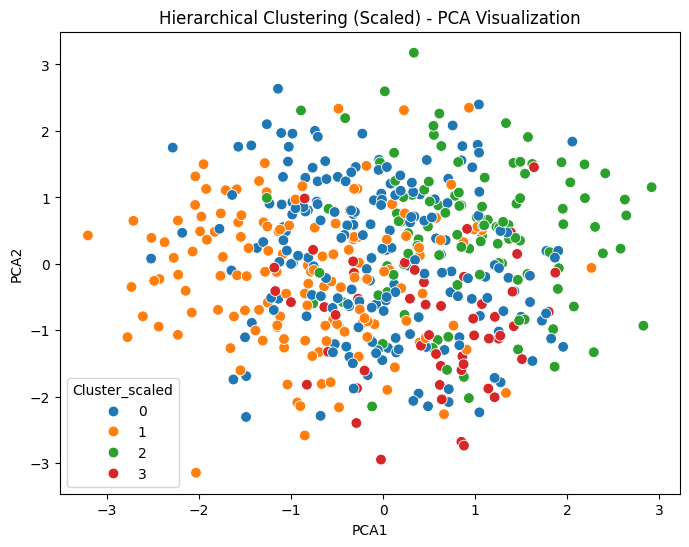

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduksi ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_scaled', palette='tab10', s=60)
plt.title("Hierarchical Clustering (Scaled) - PCA Visualization")
plt.show()


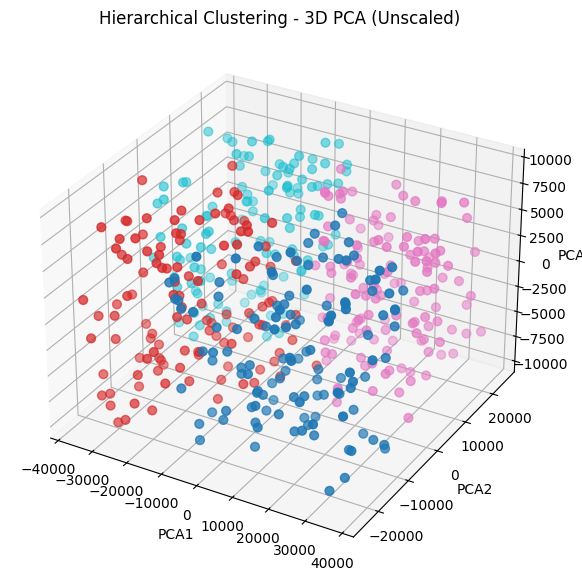

In [26]:
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
pca3_result = pca3.fit_transform(X_unscaled)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3_result[:,0], pca3_result[:,1], pca3_result[:,2],
           c=df['Cluster_unscaled'], s=40, cmap='tab10')
ax.set_title('Hierarchical Clustering - 3D PCA (Unscaled)')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()


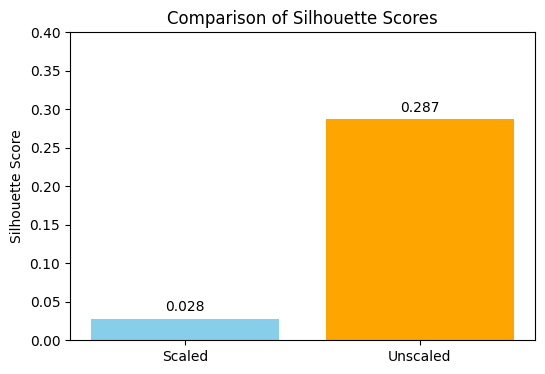

In [16]:
import matplotlib.pyplot as plt

# Data hasil evaluasi
scores = [0.0275, 0.2869]
labels = ['Scaled', 'Unscaled']

plt.figure(figsize=(6,4))
plt.bar(labels, scores, color=['skyblue','orange'])
plt.title('Comparison of Silhouette Scores')
plt.ylabel('Silhouette Score')
plt.ylim(0, 0.4)
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', fontsize=10)
plt.show()


Batang “Unscaled” jauh lebih tinggi daripada “Scaled”.
Artinya, model dengan data tanpa scaling menghasilkan pemisahan cluster yang jauh lebih jelas.
Sedangkan Scaled hampir mendekati 0, menandakan cluster-nya tumpang tindih / tidak terdefinisi dengan baik.

In [27]:
summary = df.groupby('Cluster_unscaled')[features].median()
summary


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_enc
Cluster_unscaled,,,,,,,,,,,,
0,77322.339690,37.0,583.0,10.0,41.0,5631.488707,9843.056566,11002.922000,0.518116,3.0,0.412509,1.0
1,44239.020575,40.0,537.5,11.0,52.5,4381.460207,15178.509625,9721.530313,0.534776,3.0,0.576702,1.0
2,83053.549950,41.0,556.0,12.0,50.0,5208.242721,36692.349870,9599.490747,0.548403,3.0,0.432056,1.0
3,39889.405190,37.0,566.0,11.5,54.5,5042.386979,39444.334185,12811.843530,0.510444,2.0,0.485326,1.0


### Part C – Hierarchical Clustering Results (Unscaled)

Based on the Agglomerative (Hierarchical) clustering model with 4 clusters, the results show clear financial and behavioral differences among customer groups. Using the unscaled dataset provided the best separation (Silhouette Score = 0.2869).

**Cluster 0 – Stable High-Income Customers:**  
High income and credit score, medium satisfaction, low online activity. Represent long-term loyal customers with strong financial stability.

**Cluster 1 – Digital Active Mid-Income Customers:**  
Moderate income, high online activity, and average satisfaction. Represent regular customers who are digitally engaged.

**Cluster 2 – High-Income Loyal Customers:**  
Highest income and long relationship with the bank. Represent prime clients suitable for investment and exclusive offers.

**Cluster 3 – Low-Income, Low-Satisfaction Customers:**  
Lowest income, lowest satisfaction, but high loan approvals. Represent financially sensitive customers needing support and service improvement.

**Conclusion:**  
Unscaled hierarchical clustering provides meaningful segmentation that can guide business strategies:
- Target premium offers for high-income clusters (0 & 2)
- Focus on digital engagement for cluster 1
- Improve satisfaction and financial guidance for cluster 3


# Part D – Segmentation & Managerial Implication



###  1. Model Comparison

| Aspect | Scaled Data | Unscaled Data |

| **Silhouette Score** | 0.0275 | **0.2869** |

| **Cluster Separation** | Poor – clusters overlap | **Clearer, more natural groups** |

| **Interpretability** | Difficult – features equally weighted | **Meaningful – financial features dominate** |

**Conclusion:**  
The **unscaled Agglomerative (Hierarchical) Clustering model** produces clearer and more interpretable clusters.  
When features were scaled, key financial differences such as *Income*, *Balance*, and *Credit Card Limit* became less meaningful, leading to poor separation.  
Thus, the **unscaled model** provides more business-relevant segmentation.


###  2. Why Scaling Affects Clustering

Agglomerative Clustering groups data based on **distance metrics** such as Euclidean distance.  
- Scaling changes how far apart points appear in feature space.  
- Features with naturally large ranges (e.g., *Income*, *Balance*) dominate distance calculations in the unscaled version — which is desirable in this case, as financial variables are crucial for segmentation.  
- After scaling, all variables contribute equally, making clusters less distinctive.  

Therefore, **scaling reduces the separation** between customer groups that are truly different in financial strength.



### 3. Cluster Characteristics (Unscaled Model, 4 Clusters)

| Cluster | Key Traits | Interpretation |

| **0 – Stable High-Income Customers** | High income (~77K), high credit score, moderate balance (~5K), satisfaction = 3.0, low online activity (0.41). | Loyal, financially strong clients who prefer traditional channels. |

| **1 – Digital Active Mid-Income Customers** | Medium income (~44K), high online activity (0.58), many transactions, satisfaction = 3.0. | Tech-savvy customers with average financials and strong digital engagement. |

| **2 – High-Income Loyalists** | Highest income (~83K), longest tenure (12 years), large loan approval (~36K), satisfaction = 3.0. | Long-term, high-value clients suitable for premium and investment offers. |

| **3 – Low-Income Low-Satisfaction Customers** | Lowest income (~39K), lowest satisfaction (2.0), high loan approval (~39K). | Financially sensitive customers, possibly facing credit stress. |


### 4. Managerial Recommendations

| Cluster | Recommended Strategy |
| **Cluster 0** | • Offer **wealth management** and **investment packages**.<br>• Maintain loyalty with **personalized priority services**. |
| **Cluster 1** | • Promote **digital banking** and **mobile engagement rewards**.<br>• Target with **online marketing campaigns** and **cashback promotions**. |
| **Cluster 2** | • Provide **exclusive offers**, **premium credit cards**, and **relationship management** programs.<br>• Encourage long-term retention and investment. |
| **Cluster 3** | • Focus on **customer satisfaction improvement** and **financial education**.<br>• Offer **loan restructuring** or **low-interest options** to reduce churn and risk. |


### 5. Business Implications

- The **hierarchical clustering** successfully identifies four meaningful customer segments based on financial condition, loyalty, and satisfaction.  
- These insights allow the company to **personalize marketing**, **enhance customer experience**, and **design financial products** for different needs.  
- **Cluster 0 & 2** → focus on *retention and cross-selling* of premium services.  
- **Cluster 1** → leverage *digital engagement* for growth.  
- **Cluster 3** → address *satisfaction and credit risk management*.


### 6. Summary

> The unscaled Agglomerative Clustering model provided clearer segmentation with a higher silhouette score (0.2869).  
> The four clusters reflect distinct financial and behavioral profiles, offering strong business value for marketing, product design, and customer retention strategies.  
> This segmentation can guide managers to focus on both **growth (clusters 0 & 2)** and **risk reduction (cluster 3)** while enhancing **digital engagement (cluster 1)**.

